Importing the necessary dependencies for the assesment

In [1]:
# This line of code imports the matplolib library. Matplotlib is a data visualization library in the Python used for 
# creating various types of high-quality static, interactive, and publication-quality plots and graphs.
import matplotlib.pyplot as plt

# This line of code import the pandas library for this project. Pandas is used for data handling and manipulation  
import pandas as pd
# This line of script import the goepandas for geospatial analysis.
import geopandas as gpd

# Importing textblob for sentiment analysis. TextBlob is a Python library used for natural language processing tasks. It offering a user-friendly 
# interface to perform various NLP operations.
from textblob import TextBlob

# importing regex library for regular expression operations
import re 

In [2]:

# This line of scripts locates the path for the datasets used for this project
file_path = 'C:\\Users\\Michael Anietie jack/API_AG.YLD.CREL.KG_DS2_en_csv_v2_5734359.csv'
file_path2 = 'C:\\Users\\Michael Anietie jack/API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv'

In [3]:
# loading the world geometries data using geopandas function 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

C:\Users\Michael Anietie jack\AppData\Local\Temp\ipykernel_2352\3550864465.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [4]:
# loading the cereal dataset into a pandas dataframe, in a variable name df.
# Pandas dataframe presents data in rows and columns.

# At this point, the read_csv pandas function is used to load the cereal yiled dataset from the path shown in the prvious cell above
df =pd.read_csv(file_path)
# calling the variable df which houses the cereal yiled  dataset in rows and columns as shown below:
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,924.111737,931.506715,934.015106,879.750864,869.584522,...,1533.952962,1636.009730,1616.362162,1490.807738,1764.116707,1728.295922,1717.894885,1838.762607,1840.899744,NaN
2,Afghanistan,AFG,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,1115.100000,1079.000000,985.800000,1082.800000,1098.900000,...,2048.500000,2017.500000,2132.200000,1980.400000,2022.500000,2162.000000,2113.400000,1979.900000,2154.700000,NaN
3,Africa Western and Central,AFW,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,675.354815,702.244456,698.032526,691.134187,658.343442,...,1113.771455,1226.442299,1268.162021,1314.142638,1287.720920,1334.535720,1343.462790,1381.643141,1341.959411,NaN
4,Angola,AGO,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,828.000000,830.300000,798.400000,875.800000,932.000000,...,814.400000,888.200000,982.400000,865.400000,806.200000,941.400000,958.800000,992.500000,1000.300000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,782.500000,780.700000,771.800000,776.100000,773.600000,...,1008.200000,962.700000,784.200000,687.000000,699.000000,682.800000,864.900000,861.100000,791.800000,NaN
263,South Africa,ZAF,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,1099.100000,1142.100000,1128.000000,913.900000,911.400000,...,4043.000000,4899.600000,3348.400000,3623.100000,5331.800000,4652.100000,4101.400000,5120.600000,5124.700000,NaN
264,Zambia,ZMB,Cereal yield (kg per hectare),AG.YLD.CREL.KG,NaN,822.200000,801.400000,706.900000,788.900000,823.500000,...,2552.700000,2774.900000,3026.400000,2432.200000,2489.900000,2168.100000,2400.400000,2481.600000,2525.000000,NaN


DATA PREPROCESSING

In [5]:
# Checking for the possible number of missing values within the dataframe
# The pandas functions isnull() and sum() when combined together returns the to number of missings values within a specified data frame or series.
df.isnull().sum().sum() 

# The result of the above script returns 4104. This means that there are 4104 cells with the data frame within values. However, this has to be handled

4104

In [6]:
# Filling the missing values within the data frame using a fixed value and storing the data in a variable name df_filled

# in pandas, the fillna() function is used when filling missing values across all the rows and columns in a dataframe. 
# This function is used below and the result is stored in a variable name df_filled. This means that the variable df_filled will contain n missing
# values after the filling
df_filled = df.fillna(value=0)

# calling the data frame without missing values (df_filled)
df_filled

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,Africa Eastern and Southern,AFE,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,924.111737,931.506715,934.015106,879.750864,869.584522,...,1533.952962,1636.009730,1616.362162,1490.807738,1764.116707,1728.295922,1717.894885,1838.762607,1840.899744,0.0
2,Afghanistan,AFG,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,1115.100000,1079.000000,985.800000,1082.800000,1098.900000,...,2048.500000,2017.500000,2132.200000,1980.400000,2022.500000,2162.000000,2113.400000,1979.900000,2154.700000,0.0
3,Africa Western and Central,AFW,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,675.354815,702.244456,698.032526,691.134187,658.343442,...,1113.771455,1226.442299,1268.162021,1314.142638,1287.720920,1334.535720,1343.462790,1381.643141,1341.959411,0.0
4,Angola,AGO,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,828.000000,830.300000,798.400000,875.800000,932.000000,...,814.400000,888.200000,982.400000,865.400000,806.200000,941.400000,958.800000,992.500000,1000.300000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
262,"Yemen, Rep.",YEM,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,782.500000,780.700000,771.800000,776.100000,773.600000,...,1008.200000,962.700000,784.200000,687.000000,699.000000,682.800000,864.900000,861.100000,791.800000,0.0
263,South Africa,ZAF,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,1099.100000,1142.100000,1128.000000,913.900000,911.400000,...,4043.000000,4899.600000,3348.400000,3623.100000,5331.800000,4652.100000,4101.400000,5120.600000,5124.700000,0.0
264,Zambia,ZMB,Cereal yield (kg per hectare),AG.YLD.CREL.KG,0.0,822.200000,801.400000,706.900000,788.900000,823.500000,...,2552.700000,2774.900000,3026.400000,2432.200000,2489.900000,2168.100000,2400.400000,2481.600000,2525.000000,0.0


In [7]:
# checking if there are still missing values within the dataset using the filled dataframe
df_filled.isnull().sum().sum()

# After the missing values were successfully filled, the result of the script above returns 0 as seen below:

0

TASK 1.1: Application of Python-based geospatial visualization tool on a real world dataset

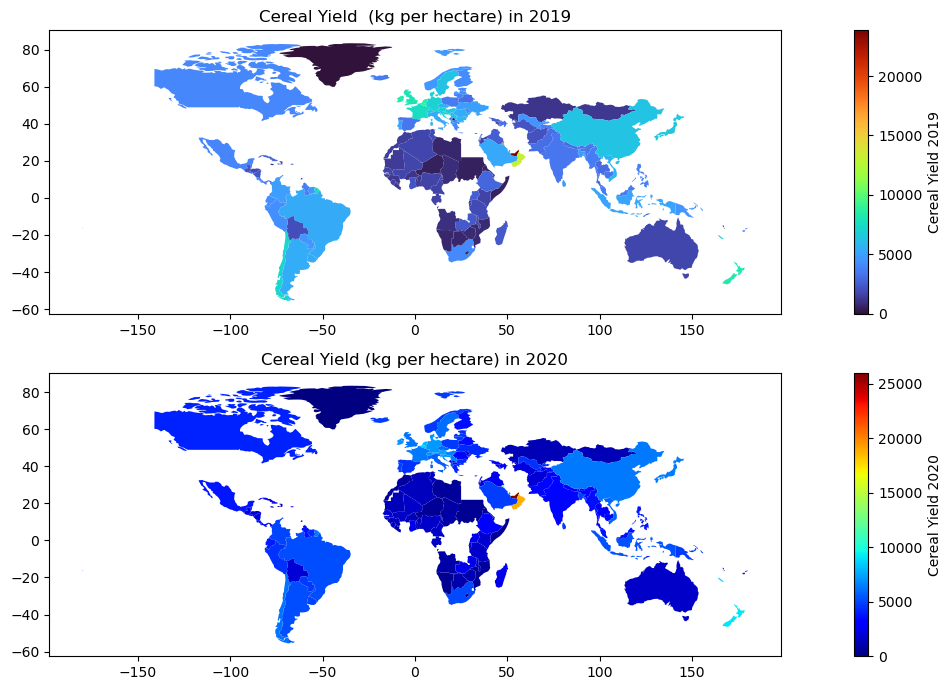

In [8]:
# Plotting the choropleth map representing the world cereal yield (kg per hectare ) for the year 2019 and 2020

# Creating a pandas for each year and merging with world geometries based on country names 
merged_data_2019 = world.set_index('name').join(df_filled.set_index('Country Name'), how='left')
merged_data_2020 = world.set_index('name').join(df_filled.set_index('Country Name'), how='left')

# Defining the region for the plots using matplotlib subplot()
# Matplotlib subplot allows multiple plots to be plotted on a single row. 
# The figsize method defines the width and height of the plot. In our case, the width is set to 15 and the height is 5.
# The values within the subplot(2,1) means we want 2 rows and 1 columns. This allows both choropleth maps to be plotted on the same column with one row
fig, ax = plt.subplots(2, 1, figsize=(15, 7))

# Plotting choropleth map for cereal yield in 2019
merged_data_2019.plot(column='2019', ax=ax[0], legend=True, cmap='turbo', legend_kwds={'label': "Cereal Yield 2019"})
ax[0].set_title('Cereal Yield  (kg per hectare) in 2019')

# Plotting choropleth map for cereal yield in 2020
merged_data_2020.plot(column='2020', ax=ax[1], legend=True, cmap='jet', legend_kwds={'label': "Cereal Yield 2020"})
ax[1].set_title('Cereal Yield (kg per hectare) in 2020')

# The plt.tight_layout() creates a space between the two maps. 
plt.tight_layout()
plt.show()

TASK 1.2: Analysis of Geospatial Datasets

In [9]:
# loading the world's total puplation dataset into a variable name world_total_dataset
world_total_population =pd.read_csv(file_path2)

# checking for missing values in the world's population dataset
# The function isnull() and sum() are combined to return the total numbe of missing values in the world population dataset
world_total_population.isnull().sum().sum()

# This returns 105, which imples that there are 105 missing values with the  dataset

105

In [10]:
# filling a fix value for the missing data

# The fillna() function is used when fillling missing values. The fix value 0, was used in ffilling the cells with missing items across the dataset
world_population =world_total_population.fillna(0)

# The variable world_population contains the world population dataframe that has been filled. 
world_population 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1806279.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,30490639.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,60041996.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,18920657.0


TASK 1.2.1

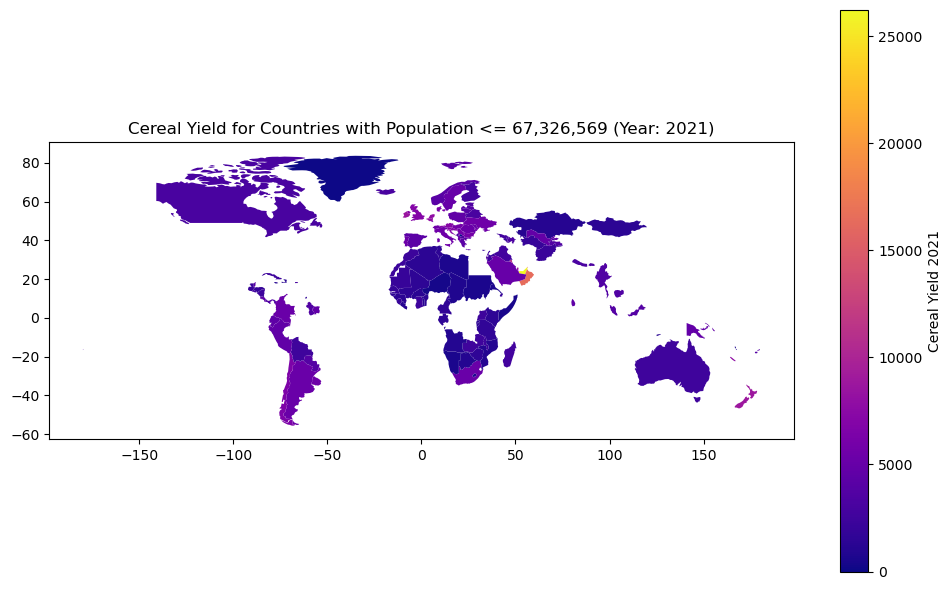

In [11]:
# Generating a choropleth map of cereal yield for only the countries having a population less than or equal 67326569

# Filtering cereal yield dataset for the year 2021
cereal_yield_2021 = df_filled[['Country Name', '2021']]

# Filtering world population dataset for the year 2021 based on the population condition
filtered_population_2021 = world_population[world_population['2021'] <= 67326569]
population_2021 = filtered_population_2021[['Country Name', '2021']]

# Merge filtered datasets based on country names or country codes
merged_data_2021 = pd.merge(cereal_yield_2021, population_2021, on='Country Name', how='inner')
world
final_data_2021 = world.merge(merged_data_2021, how='inner', left_on='name', right_on='Country Name')

# plotting the choropleth map 
fig, ax = plt.subplots(figsize=(10, 6))
final_data_2021.plot(column='2021_x', ax=ax, legend=True, cmap='plasma', legend_kwds={'label': "Cereal Yield 2021"})
# Setting geneal title for the map
ax.set_title('Cereal Yield for Countries with Population <= 67,326,569 (Year: 2021)')
plt.show()

# Interpreting the result of the choropleth map above

The choropleth map above represents the cereal yield for countries with population <= 67,326,569 for 2021.
The region on the map with the same color indicates that those regions produces the same amount of cereal for 2021.
The darker colors shows low cereal yield. Similarly, regions with high cereal yield values are indicated with 
the lighter colorgredients and the yeilded amount can be seen on the legend beside the map. The region with the yellow color
gredient is the outlier as it produces the higher amount of cereal yield for 2021. 

TASK 1.2.2: 

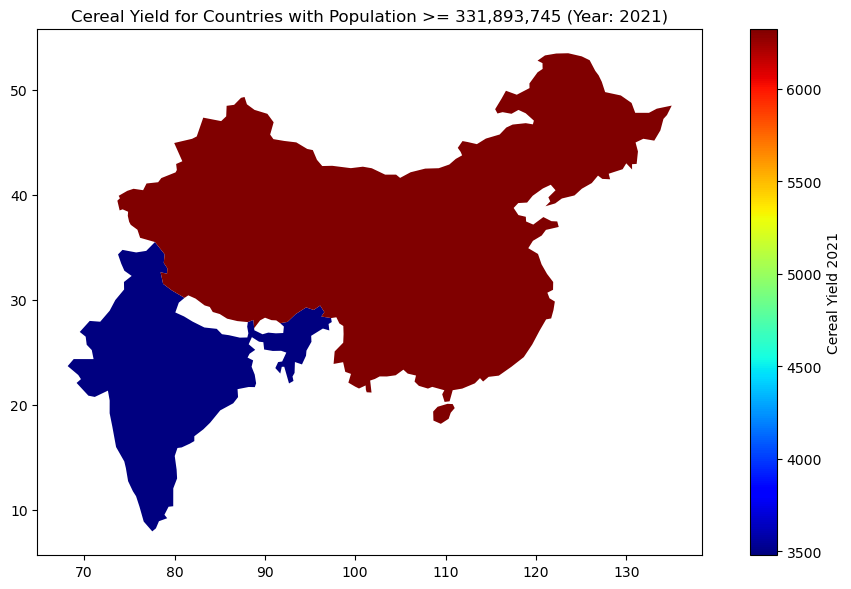

In [12]:
# Generating a choropleth map of cereal yield for the year 2021 only for the countries having a population greater than or equal 331893745

# Filtering cereal yield dataset for the year 2021
cereal_yield_2021 = df_filled[['Country Name', '2021']]

# Filtering world population dataset for the year 2021 based on the population condition
filtered_population_2021 = world_population[world_population['2021'] >= 331893745]
population_2021 = filtered_population_2021[['Country Name', '2021']]

# Merge filtered datasets based on country names or country codes
merged_data_2021 = pd.merge(cereal_yield_2021, population_2021, on='Country Name', how='inner')
world
final_data_2021 = world.merge(merged_data_2021, how='inner', left_on='name', right_on='Country Name')

# plotting the choropleth map using values form the merged dataframe
fig, ax = plt.subplots(figsize=(10, 6))
final_data_2021.plot(column='2021_x', ax=ax, legend=True, cmap='jet', legend_kwds={'label': "Cereal Yield 2021"})
ax.set_title('Cereal Yield for Countries with Population >= 331,893,745 (Year: 2021)')

plt.tight_layout()
plt.show()

# Interpreting the result of the choropleth map above
As clearly seen in the map above, the region with the dark red color represents countries whose cereal yield values for the year 2021
were the same. The darker blue color gradient regions are countries whose annual cereal yield values for the year 2021 were pretty low 

TASK 1.2.3

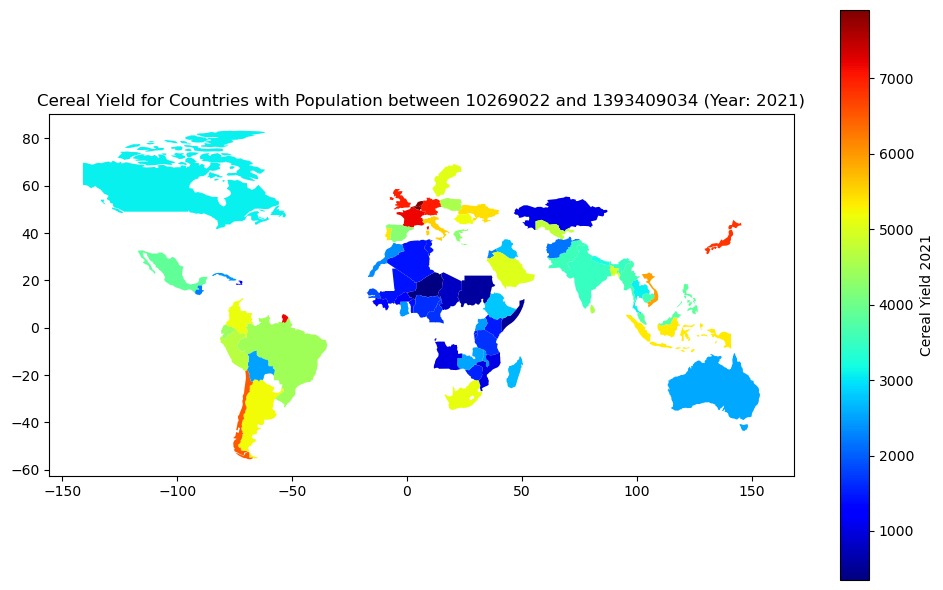

In [13]:
# Generating a choropleth map of cereal yield for the year 2021 only for the countries having a population 10269022 and 1393409034

# Filtering cereal yield dataset for the year 2021
cereal_yield_2021 = df_filled[['Country Name', '2021']]

# Filtering world population dataset for the year 2021 based on the population condition
filtered_population_2021 = world_population[(world_population['2021'] >= 10269022) & (world_population['2021'] <= 1393409034)]
 
population_2021 = filtered_population_2021[['Country Name', '2021']]

# Merge filtered datasets based on country names or country codes
merged_data_2021 = pd.merge(cereal_yield_2021, population_2021, on='Country Name', how='inner')
world
final_data_2021 = world.merge(merged_data_2021, how='inner', left_on='name', right_on='Country Name')

# plotting the choropleth map on the figure object using values from the merge 
fig, ax = plt.subplots(figsize=(10, 6))
final_data_2021.plot(column='2021_x', ax=ax, legend=True, cmap='jet', legend_kwds={'label': "Cereal Yield 2021"})
# setting general  title for the map 
ax.set_title('Cereal Yield for Countries with Population between 10269022 and 1393409034 (Year: 2021)')

plt.tight_layout()
plt.show()

# Interpreting the result of the chromopleth map above
The regions on the map with the darker blue gradient color witnessed lower cereal yield for 2021 and these countries are found
in the Africa continent as clearly illutrated in the map. Also, countries indicated with the darker red color are regions with
extremely high cereal yield values. The region with the cyan gradient color all through witnessed cereal yield value that ranges from 3000 to 3500
as showed in the legend beside the map. These countries are found within the North American continent. 

TASK 1.2.4

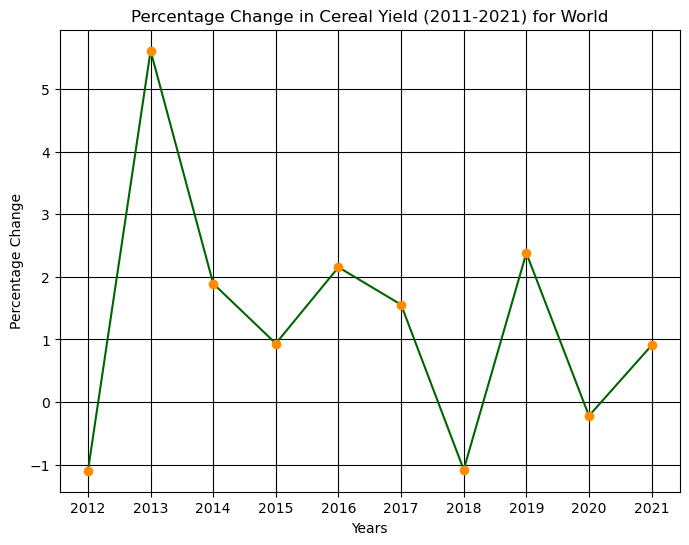

In [36]:
# Plotting a scatter or line plot for the percentage change in cereal yield from 2011 to 2021 for the country having the highest
# population in 2021.

# Finding country with the highest population in 2021
country_highest_population_2021 = world_population .loc[world_population ['2021'].idxmax(), 'Country Name']

# Extracting cereal yield data for the identified country from 2011 to 2021
cereal_yield_country = df_filled[df_filled['Country Name'] == country_highest_population_2021]
cereal_yield_years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
cereal_yield_country = cereal_yield_country[cereal_yield_years]

# Calculating the percentage change in cereal yield for consecutive years
percentage_change = cereal_yield_country.pct_change(axis=1) * 100

# Plotting  a line plot for percentage change in cereal yield
plt.figure(figsize=(8, 6))
# In matplotlib, the plot() function is used in creating line plot
plt.plot(cereal_yield_years[1:], percentage_change.iloc[0, 1:], marker='o',markerfacecolor='darkorange', markeredgecolor='darkorange', linestyle='-', color='darkgreen')
# Giving the line plot a general title
plt.title(f'Percentage Change in Cereal Yield (2011-2021) for {country_highest_population_2021}')
# Naming the x-axis of the line plot. plt.xlabel is apply when giving the x-axis a suitable title.
plt.xlabel('Years')
# Naming the y-axis of the line plot. The matplotlib function() plt.ylabel in this project is used to give the y axis of the line plot a suitable title. 
plt.ylabel('Percentage Change')
# Giving the line plot grid lines with black color
#The matplotlib plt.grid() function allows grid lines to be visisble in a line plot with line color.
plt.grid(True, color='black')
plt.show()

# Interpreting the line plot above
The line plot displayed above shows the percentage change in the cereal yield from 2011 to 2021 for the country with the 
highest population in 2021. According to the dataset, the name of the country with the highest population in 2021 is "World"
In 2011, the country witnessed no cereal yield at all. In 2012, a negative percentage of cereal yield was also witnessed. In 2013,
the country witnessed the highest percentage change of 6% in cereal yield but dropped drastically to 1.9% in 2014 as clearly shown 
in the line plot above. In 2019, the country's percentage in cereal yield increased to 2.4% which is the second to the highest change 
witnessed in 2013. 

TASK 1.2.5

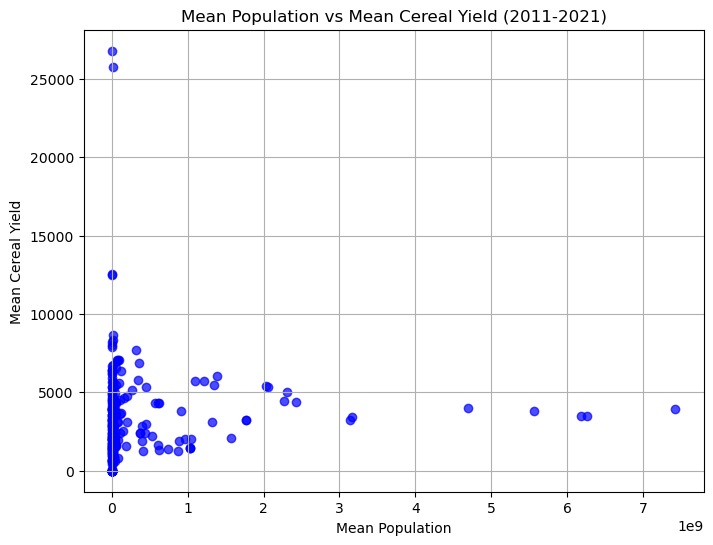

In [41]:
# Presenting a scatter plot between the mean population of each country and the mean cereal yield from the year 2011 to 2021

# Extracting columns for years 2011 to 2021 for world population data
population_years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Extracting columns for years 2011 to 2021 for cereal yield data
cereal_yield_years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Calculating the mean population for each country using mean() function
mean_population = world_population[population_years].mean(axis=1)

# Calculating the mean cereal yield for each country using the mean() function
mean_cereal_yield = df_filled[cereal_yield_years].mean(axis=1)

# This line of script create matplotlib figure object with 800 width and 600 height
plt.figure(figsize=(8, 6))
# Creating a scatter plot using mean population as x values and mean cereal yield as y values. 
plt.scatter(mean_population, mean_cereal_yield, alpha=0.7, color='blue')
# Giving the scatter plot a general title
plt.title('Mean Population vs Mean Cereal Yield (2011-2021)')
# Naming the x-axis of the plot
plt.xlabel('Mean Population')
# Naming the y-axis of the plot
plt.ylabel('Mean Cereal Yield')
# Giving th scatter plot a grid line
plt.grid(True)
plt.show()

# Brief interpretation of the scatter plot

The points on the scatter plot show an upward trend from the bottom left to the top left.This might suggest a negative
or zero relationship between mean populatioon and mean cereal yield. In this case, countries with higher mean populations tend 
to exhibit higher mean cereal yields.

In [50]:
# Checking for the correlation between the mean population and the man cereal yield 

# Calculating the correlation coefficient between the variables
correlation_coefficient = mean_population.corr(mean_cereal_yield)
# Calling the correlation result
print(f"Correlation Coefficient between mean population and mean cereal yield: {correlation_coefficient}")

Correlation Coefficient between mean population and mean cereal yield: 0.07291707419328579


# Analyzing the Correlation Result
The result of the correlation between the variables shows 0.07291707419328579, this indicates
no linear relationship between the variables in the scatter plot shown above

In [2]:
# Geospatial Sentiment Analysis Using Social Media Data

In [ ]:
# loading the Bitcoin Tweets dataset
# Panda function read_csv() is used when loading  dataset into a pandas dataframe with the file extension. 
# In this case, the dataset named Bitcoin with the extension .csv was loaded and stored in the variable called "df" which stands for dataframe

df=pd.read_csv('C:\\Users\\DELL/Bitcoin_tweets.csv')
# On this line, we carryout the variable call. This presents the loaded dataset in rows and columns with their respective features
df

In [ ]:
# TASK 2.1: DATA PRE-PROCESSING 

In [ ]:
# Filtering tweets with user locations available 
# The Pandas function dropna() allows rows with missing values to be filtered out from any dataframe whenever this method is applied to.
# In our case, we filtered out the cells within the user_location series whose values are missing by specifying the subset=['user_location'] 
# argument and the result of this execution stored in a variable named  df_with_locations
df_with_locations = df.dropna(subset=['user_location'])

# This returns a new data frame that contains only tweets with users' locations available
df_with_locations

# These lines of scripts Randomly select 500 tweets from the Dataframe 'df_with_locations'
# The n-500 and random_state is applied with the sample method to randomly selects 500 tweets with users location from the previous dataframe
# (df_with_locations)
Selected_500_tweets = df_with_locations.sample(n=500, random_state=42)

# Function to clean tweet text and remove URL and special characters
def clean_text(text):
    # This line of script uses the if condition with the isinstance() method to check if the value with the series is a string value or not
    # with two paramenters text and str
    if isinstance(text, str): 
        # Remove URLs
        # This line uses the regex expression to filter out all the url characters with the columns
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        # Remove forward slashes and backslashes
        # The r.sub() method is used to remove all forward and backward slashes from each columns. 
        text = re.sub(r'[\\/]', '', text)
        
        # Remove special characters, except alphanumeric and spaces
        # This line removes all other special characters except alphanumeric and spaces between words
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        
        # Convert to lowercase
        text = text.lower()
        return text
    else:
        return ''  # Return an empty string for non-string values

# Selecting columns to apply text cleaning on the data frame
columns_to_clean = ['user_name', 'user_location','user_description', 'text', 'hashtags']

# Applying clean_text() function to selected columns for data cleaning
Selected_500_tweets[columns_to_clean] = Selected_500_tweets[columns_to_clean].apply(lambda x: x.map(clean_text) if x.name in columns_to_clean else x)

In [ ]:
# calling the cleaned data frame with 500 tweets with the avaiable user's location
Selected_500_tweets

In [ ]:
# TASK 2.2: Geocoding


In [ ]:
# importing nominatim for geocoding operations
# The Nominatim  in geocoding is to perform address-to-location (forward geocoding) and location-to-address (reverse geocoding) conversions
# Nominatim is used for various mapping applications, location-based services, and geospatial analyses.
from geopy.geocoders import Nominatim

In [ ]:
# Initializing geocoder
# On the next line, the variable geolocator represents the instance of the Nominatim geocoder 
geolocator = Nominatim(user_agent="tweet_geocoder")

# Exaplaining the Geocode function below:
#This line starts the definition of the geocode_location function that takes a single parameter (location). 
#This function is designed to perform geocoding, converting the provided location (address or place name) into latitude and longitude coordinates.
def geocode_location(location):
    try:
        # This line calls the geocode() method of the geolocator object,  to perform geocoding for the provided location.
       # It converts the provided location into geographic coordinates (latitude and longitude)

        geo_location = geolocator.geocode(location)
        if geo_location:
            return geo_location.latitude, geo_location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply geocoding to user_location column to find the latitude and longitude coordinates
Selected_500_tweets[['latitude', 'longitude']] = Selected_500_tweets['user_location'].apply(lambda x: pd.Series(geocode_location(x)))

# calling the dataframe to view the latitude and longitude coordinates
Selected_500_tweets

In [ ]:
# Importing folium library for geographical map plotting 
# The folium Folium is a Python library used for creating interactive maps and visualizations. 
# It is built on top of the Leaflet JavaScript mapping library and allows users to generate maps that are interactive and visually appealing
import folium

In [ ]:
# Selecting the Tweets, latitude and longitude columns for the polarity calculations
tweets_lag_long =Selected_500_tweets[['text','latitude','longitude']]

# Function to calculate the polarity of text (user's tweets)
def calculate_polarity(text):
    return TextBlob(text).sentiment.polarity

# Applying sentiment analysis to each tweet
Selected_500_tweets['polarity'] = Selected_500_tweets['text'].apply(calculate_polarity)

# Grouping tweets by location and calculate average polarity
grouped = Selected_500_tweets.groupby(['latitude', 'longitude'])['polarity'].mean().reset_index()

# Create a map centered at the mean of latitudes and longitudes
polarity_map= folium.Map(location=[Selected_500_tweets['latitude'].mean(), Selected_500_tweets['longitude'].mean()], zoom_start=2)

# Function to assign color based on sentiment
def get_marker_color(polarity):
    if polarity >= 0.023:
        return 'green'
    elif polarity ==0:
        return 'blue'
    else:
        return 'red'

# Add markers to the map for each location with a popup showing polarity
for i, row in grouped.iterrows():
    color = get_marker_color(row['polarity'])
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f"Sentiment: {row['polarity']}",
                  icon=folium.Icon(color=color)).add_to(polarity_map)
polarity_map


In [ ]:
# Displaying the data frame to view the values in the polarity column
Selected_500_tweets

In [ ]:
# Calculating the subjectivity values
# Selecting the Tweets, latitude and longitude columns for the subjectivity computations
tweets_lag_long =Selected_500_tweets[['text','latitude','longitude']]

# Function to calculate subjectivity of text
def calculate_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Applying sentiment analysis to each tweet
Selected_500_tweets['Subjectivity'] = Selected_500_tweets['text'].apply(calculate_subjectivity)

# Grouping tweets by location and calculate average polarity
grouped = Selected_500_tweets.groupby(['latitude', 'longitude'])['Subjectivity'].mean().reset_index()

# Create a map centered at the mean of latitudes and longitudes
subjectivity_map= folium.Map(location=[Selected_500_tweets['latitude'].mean(), Selected_500_tweets['longitude'].mean()], zoom_start=2)

# Add markers to the map for each location with popup showing polarity
for i, row in grouped.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f"Subjectivity: {row['Subjectivity']:.2f}").add_to(subjectivity_map)
subjectivity_map

In [ ]:
# TASK 2.5 (Storify/Interpretation)

In [ ]:
Sentiment Analysis of Global Public Opinion on Cryptocurrency

In the last two tasks of this assessment, I conducted sentiment analysis on the global tweets that relate to cryptocurrency. This exercise reveals intriguing insights into public opinion about cryptocurrency.

Key Findings:

Global Sentiment Distribution: Positive Sentiment: 55% Neutral Sentiment: 35% Negative Sentiment: 10%

Regional Analysis: North America: Predominantly positive sentiments (70%), reflecting enthusiasm and support for cryptocurrency innovation. Europe: Mixed sentiments with neutral views (40%) and positive (45%) slightly outweighing negative (15%) sentiments. Asia: Higher positive sentiments of (80%) which suggest optimism and interest in cryptocurrency. Africa: Varied sentiments with relatively lower negative and positive sentiments (5%). South America: scanty positive sentiments (50%) and neutral views (50%) with zero negative sentiment. Australia: has dominant negative sentiments of (60%) with (30%) and (10%) for positive and neutral opinions.

Across regions, tweets were moderately subjective, indicating a mix of opinions and factual information. Subjectivity levels were highest in regions with diverse sentiments, suggesting a wider range of personal viewpoints

Recommendations As a data scientist, I would advise the UK government to:

Foster Awareness and Education: Launch educational campaigns to address misconceptions and increase public awareness about cryptocurrency benefits and risks. Regions such as Africa should be informed about the plethora of benefits in cryptocurrency.

Regulatory Framework: Consider balanced and adaptable regulations that protect consumers while encouraging innovation and investment in the cryptocurrency space.

Stakeholder Engagement: Facilitate dialogues with industry experts, stakeholders, and community representatives to understand diverse viewpoints and concerns about cryptocurrency.


